In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import pandas_profiling

In [87]:
#Importing the data

CC_df=pd.read_csv('C:\Users\Anirudh Mathur\Desktop\case studies\CREDIT CARD CASE STUDY - SEGMENTATION\CC GENERAL.csv')

In [88]:
CC_df.shape

(8950, 18)

# Initial Insights Of Data

In [89]:
pandas_profiling.ProfileReport(CC_df)

Number of variables,18
Number of observations,8950
Total Missing (%),0.2%
Total size in memory,1.2 MiB
Average record size in memory,144.0 B
Numeric,16
Categorical,0
Date,0
Text (Unique),1
Rejected,1
Distinct count,8871


## Filling the missing data

In [90]:
CC_df['MINIMUM_PAYMENTS'].fillna(CC_df['MINIMUM_PAYMENTS'].median(), inplace=True)
CC_df['CREDIT_LIMIT'].fillna(CC_df['CREDIT_LIMIT'].median(), inplace=True)

In [91]:
CC_df.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

## Deriving new insights

### Monthly Average Purchase

In [92]:
CC_df['MONTHLY_AVERAGE_PURCHASE'] = CC_df['PURCHASES']/12.00
print CC_df['MONTHLY_AVERAGE_PURCHASE'].head()

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: MONTHLY_AVERAGE_PURCHASE, dtype: float64


### Monthly Cash Advance Amount

In [93]:
CC_df['MONTHLY_CASH_ADVANCE_AMOUNT'] = CC_df['CASH_ADVANCE']/12.00
print CC_df['MONTHLY_CASH_ADVANCE_AMOUNT'].head()

0      0.000000
1    536.912124
2      0.000000
3     17.149001
4      0.000000
Name: MONTHLY_CASH_ADVANCE_AMOUNT, dtype: float64


In [94]:
CC_df.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
5,0.00,1333.28
6,6402.63,688.38
7,0.00,436.20
8,661.49,200.00
9,1281.60,0.00


### Purchase By Type

In [95]:
def purchases(CC_df):
    
    if(CC_df['ONEOFF_PURCHASES']==0) & (CC_df['INSTALLMENTS_PURCHASES']==0):
        return 'None'
    if(CC_df['ONEOFF_PURCHASES']>0) & (CC_df['INSTALLMENTS_PURCHASES']==0):
        return 'One_Of'
    if(CC_df['ONEOFF_PURCHASES']==0) & (CC_df['INSTALLMENTS_PURCHASES']>0):
        return 'Installment_Purchases'
    if(CC_df['ONEOFF_PURCHASES']>0) & (CC_df['INSTALLMENTS_PURCHASES']>0):
        return 'Both'

In [96]:
CC_df['PURCHASE_BY_TYPE']=CC_df.apply(purchases,axis=1)

In [97]:
CC_df['PURCHASE_BY_TYPE'].value_counts()

Both                     2774
Installment_Purchases    2260
None                     2042
One_Of                   1874
Name: PURCHASE_BY_TYPE, dtype: int64

In [98]:
#CC_df['AVERAGE_AMT_PER_PURCHASE']

In [99]:
#CC_df['CASH_ADVANCE_TRANSACTION']

### Limit Usage

In [100]:
CC_df['LIMIT_USAGE'] = CC_df['BALANCE']/CC_df['CREDIT_LIMIT']
print CC_df['LIMIT_USAGE'].head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: LIMIT_USAGE, dtype: float64


### Payment To Minimum Payment Ratio

In [101]:
CC_df['PAYMENTS_MINIMUMPAYMENTS_RATIO'] = CC_df['PAYMENTS']/CC_df['MINIMUM_PAYMENTS']
print CC_df['PAYMENTS_MINIMUMPAYMENTS_RATIO'].head()

0    1.446508
1    3.826241
2    0.991682
3    0.000000
4    2.771075
Name: PAYMENTS_MINIMUMPAYMENTS_RATIO, dtype: float64


In [128]:
# Average payment_minpayment ratio for each purchse type.
x=CC_df.groupby('PURCHASE_BY_TYPE').apply(lambda x: np.mean(x['PAYMENTS_MINIMUMPAYMENTS_RATIO']))
type(x)
x.values

array([  7.23698216,  13.2590037 ,  10.08745106,   5.57108156])

In [129]:
#plt.barh(left=np.arange(len(x)),bottom=x.values)
fig,ax=plt.subplots()
ax.barh(bottom=range(len(x)),width=x.values)
ax.set(yticks= np.arange(len(x)),yticklabels=x.index);
sns.plt.title('Mean payment_minpayment ratio for each purchse type')

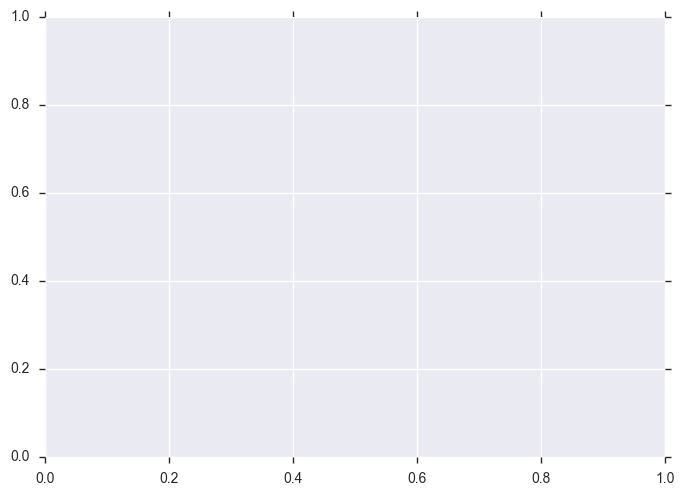

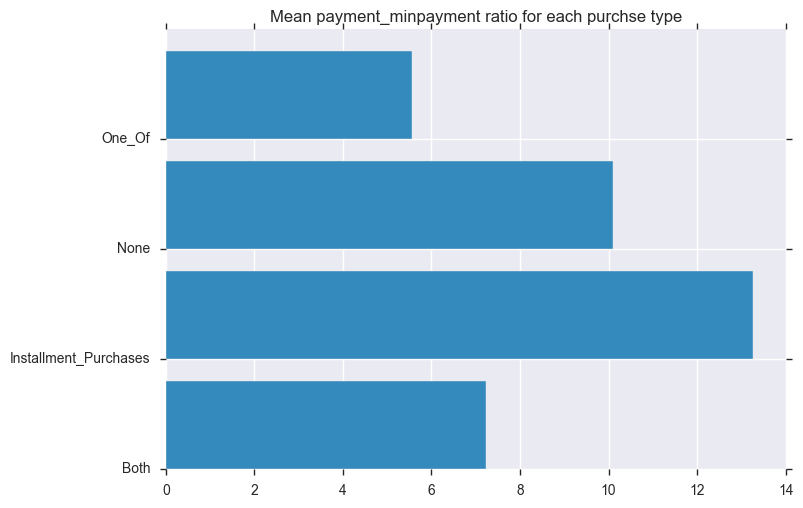

In [131]:
plt.show()

## Dues are paid by customers with installment purchases

In [132]:
CC_df.groupby('PURCHASE_BY_TYPE').apply(lambda x: np.mean(x['MONTHLY_CASH_ADVANCE_AMOUNT'])).plot.barh()

sns.plt.title('Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

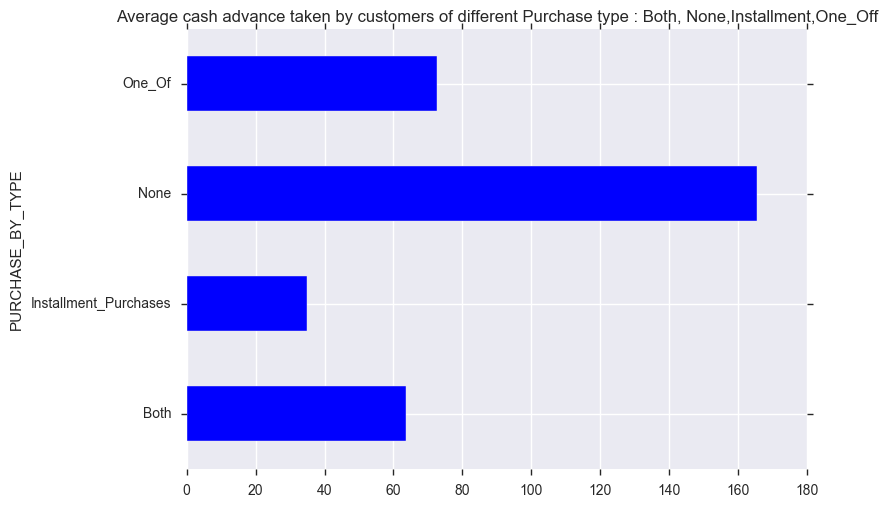

In [133]:
plt.show()

## Customers who don't make either type of purchases take more cash in advance

In [134]:
CC_df.groupby('PURCHASE_BY_TYPE').apply(lambda x: np.mean(x['LIMIT_USAGE'])).plot.barh()

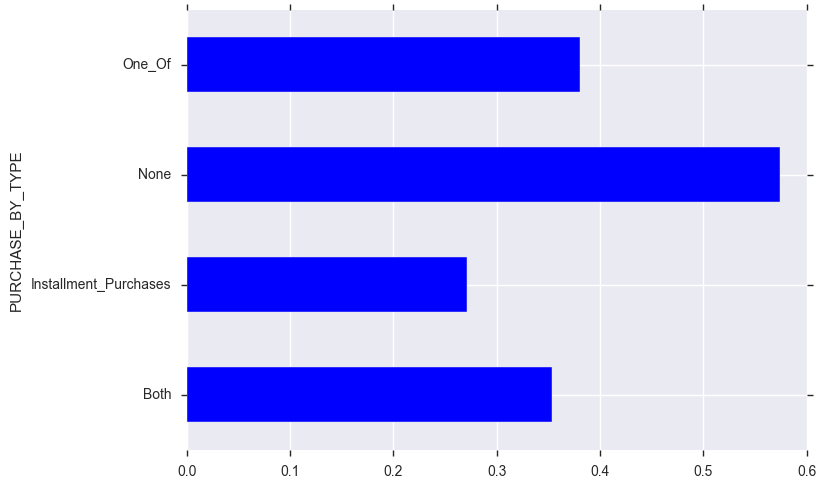

In [135]:
plt.show()

## Customers with lower limit usage that is installment purchases customer , credit limit should be reduced

## Customers with high limit usage score that is (none) should be offered high credit limit 

In [136]:
CC_df.shape

(8950, 23)

## Treating outliers

In [137]:
#treating extreme values using log transformation

CC_log_df=CC_df.drop(['CUST_ID','PURCHASE_BY_TYPE'],axis=1).applymap(lambda x: np.log(x+1))


In [138]:
CC_log_df.describe

<bound method DataFrame.describe of        BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     3.735304           0.597837   4.568506          0.000000   
1     8.071989           0.646627   0.000000          0.000000   
2     7.822504           0.693147   6.651791          6.651791   
3     7.419183           0.492477   7.313220          7.313220   
4     6.707735           0.693147   2.833213          2.833213   
5     7.501540           0.693147   7.196147          0.000000   
6     6.442955           0.693147   8.866724          8.764620   
7     7.509145           0.693147   6.080391          0.000000   
8     6.923556           0.693147   6.759824          6.496005   
9     5.031914           0.435318   7.156645          7.156645   
10    7.165590           0.693147   6.825590          0.000000   
11    6.448565           0.597837   7.308663          7.308663   
12    7.325102           0.693147   8.076823          7.824538   
13    6.827297           0.693147   7.66

In [139]:
col_list=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
CC_pre_mach=CC_log_df[[x for x in CC_log_df.columns if x not in col_list]]

In [140]:
CC_pre_mach.shape

(8950, 13)

In [141]:
CC_df['PURCHASE_BY_TYPE']

0       Installment_Purchases
1                        None
2                      One_Of
3                      One_Of
4                      One_Of
5       Installment_Purchases
6                        Both
7       Installment_Purchases
8                        Both
9                      One_Of
10      Installment_Purchases
11                     One_Of
12                       Both
13                       Both
14                       None
15      Installment_Purchases
16                       None
17      Installment_Purchases
18                       Both
19      Installment_Purchases
20      Installment_Purchases
21                       Both
22      Installment_Purchases
23                       Both
24                       None
25      Installment_Purchases
26                     One_Of
27      Installment_Purchases
28                       Both
29      Installment_Purchases
                ...          
8920                     None
8921    Installment_Purchases
8922    In

## Creating Dummies

In [142]:
CC_original=pd.concat([CC_df,pd.get_dummies(CC_df['PURCHASE_BY_TYPE'])],axis=1)

In [143]:
CC_pre_mach['PURCHASE_BY_TYPE']=CC_df.loc[:,'PURCHASE_BY_TYPE']

C:\Users\Anirudh Mathur\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [144]:
CC_mach=pd.concat([CC_pre_mach,pd.get_dummies(CC_pre_mach['PURCHASE_BY_TYPE'])],axis=1)

In [145]:
dr=['PURCHASE_BY_TYPE']

In [146]:
CC_mach=CC_mach.drop(dr,axis=1)
CC_mach.isnull().any()

BALANCE_FREQUENCY                   False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
MONTHLY_AVERAGE_PURCHASE            False
MONTHLY_CASH_ADVANCE_AMOUNT         False
LIMIT_USAGE                         False
PAYMENTS_MINIMUMPAYMENTS_RATIO      False
Both                                False
Installment_Purchases               False
None                                False
One_Of                              False
dtype: bool

In [147]:
pandas_profiling.ProfileReport(CC_mach)

Number of variables,17
Number of observations,8950
Total Missing (%),0.0%
Total size in memory,944.0 KiB
Average record size in memory,108.0 B
Numeric,12
Categorical,0
Date,0
Text (Unique),0
Rejected,5
Distinct count,43


In [149]:
sns.heatmap(CC_mach.corr())

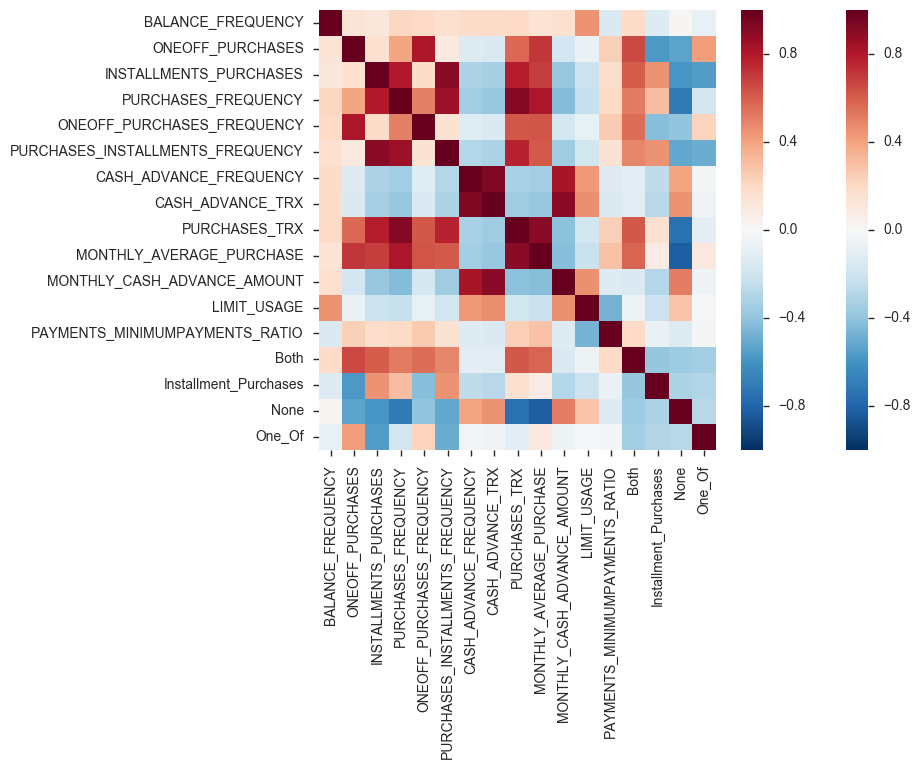

In [150]:
sns.plt.show()

## Scaling Data

In [152]:
from sklearn.preprocessing import StandardScaler

In [153]:
sc=StandardScaler()

In [154]:
CC_scaled=sc.fit_transform(CC_mach)

In [155]:
from sklearn.decomposition import PCA

## PCA Anaylsis

In [157]:
var_ratio={}
for n in range(4,15):
    pc=PCA(n_components=n)
    CC_pca=pc.fit(CC_scaled)
    var_ratio[n]=sum(CC_pca.explained_variance_ratio_)

In [158]:
pd.Series(var_ratio).plot()

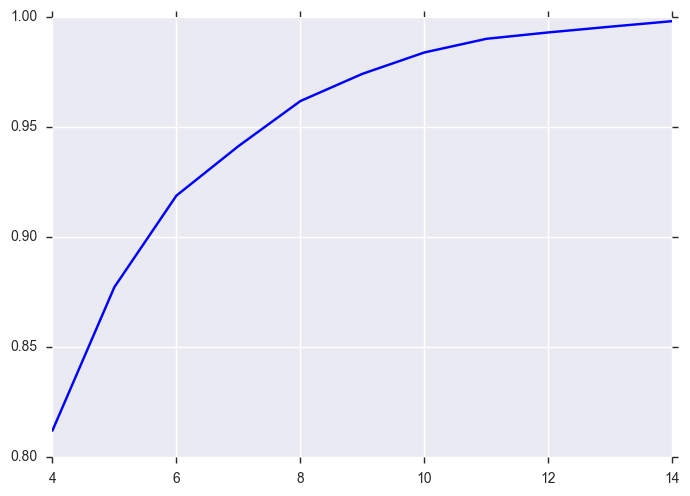

In [159]:
plt.show()

In [160]:
pc_final=PCA(n_components=5).fit(CC_scaled)
Reduced_CC=pc_final.fit_transform(CC_scaled)

In [161]:
print pc_final.explained_variance_ratio_.sum()

0.877117476416


In [162]:
col_list_1=CC_mach.columns

In [163]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' + str(i) for i in range(5)], index=col_list_1)

,PC_0,PC_1,PC_2,PC_3,PC_4
BALANCE_FREQUENCY,0.029808,0.241015,-0.262587,0.354360,0.224423
ONEOFF_PURCHASES,0.214266,0.404947,0.240512,-0.000819,0.022598
INSTALLMENTS_PURCHASES,0.312031,-0.097744,-0.315840,-0.087713,0.002359
PURCHASES_FREQUENCY,0.345664,0.015610,-0.162650,0.074850,-0.117146
ONEOFF_PURCHASES_FREQUENCY,0.214909,0.361248,0.164560,-0.035279,0.050204
PURCHASES_INSTALLMENTS_FREQUENCY,0.295375,-0.111411,-0.330246,-0.023215,-0.026254
CASH_ADVANCE_FREQUENCY,-0.214288,0.286473,-0.277384,-0.097916,-0.359096
CASH_ADVANCE_TRX,-0.229357,0.292428,-0.284246,-0.105217,-0.332724
PURCHASES_TRX,0.355596,0.106584,-0.102366,0.054717,-0.107164
MONTHLY_AVERAGE_PURCHASE,0.346667,0.142740,0.023938,0.075910,-0.187079


In [164]:
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(5)])

PC_0    0.402135
PC_1    0.180792
PC_2    0.147370
PC_3    0.081547
PC_4    0.065274
dtype: float64

## Model Building

In [168]:
from sklearn.cluster import KMeans

In [169]:
km_4=KMeans(n_clusters=4, random_state=123)

In [170]:
km_4.fit(Reduced_CC)
km_4.labels_

array([1, 2, 0, ..., 1, 2, 0])

In [171]:
pd.Series(km_4.labels_).value_counts()

3    2757
1    2228
2    2091
0    1874
dtype: int64

In [172]:
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in km_4.labels_]
plt.figure(figsize=(7,7))
plt.scatter(Reduced_CC[:,0],Reduced_CC[:,1],c=label_color,cmap='Spectral',alpha=0.5)

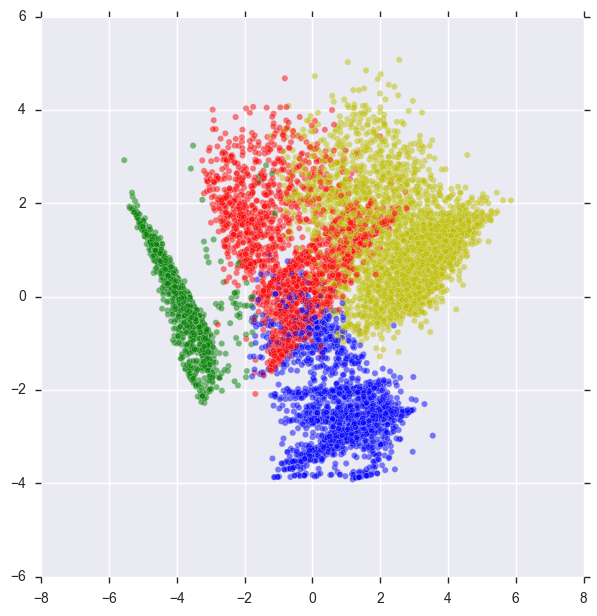

In [173]:
plt.show()

# Checking performance of kmeans using different no. of clusters

In [174]:
from sklearn import metrics
metrics.silhouette_score(Reduced_CC, km_4.labels_)

0.45905274478456498

In [175]:
k_range = range(4,8)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(Reduced_CC)
    scores.append(metrics.silhouette_score(Reduced_CC, km.labels_))

In [176]:
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

# Since best silhoutte score is for 4 Clusters therefore Kmeans is best suitable with 4 clusters 

# Now we will try Dbscan for clustering

In [177]:
from sklearn.cluster import DBSCAN

In [178]:
DBSCAN?

In [179]:
db=DBSCAN(eps=1, min_samples=5)
db.fit(Reduced_CC)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
    min_samples=5, p=None, random_state=None)

In [180]:
db.labels_

array([0, 1, 2, ..., 0, 1, 2], dtype=int64)

In [181]:
db.labels_.view()

array([0, 1, 2, ..., 0, 1, 2], dtype=int64)

In [182]:
df_pair_plot_db=pd.DataFrame(Reduced_CC,columns=['PC_' +str(i) for i in range(5)])
df_pair_plot_db['cluster'] = db.labels_
df_pair_plot_db.sort('cluster')
df_pair_plot_db['cluster'].value_counts()

C:\Users\Anirudh Mathur\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


 3    2755
 0    2246
 1    2038
 2    1867
-1      44
Name: cluster, dtype: int64

In [183]:
color_map={0:'r',1:'b',2:'g',3:'y',-1:'m'}
label_color=[color_map[l] for l in db.labels_]
plt.figure(figsize=(7,7))
plt.scatter(Reduced_CC[:,0],Reduced_CC[:,1],c=label_color,cmap='Spectral',alpha=0.5)

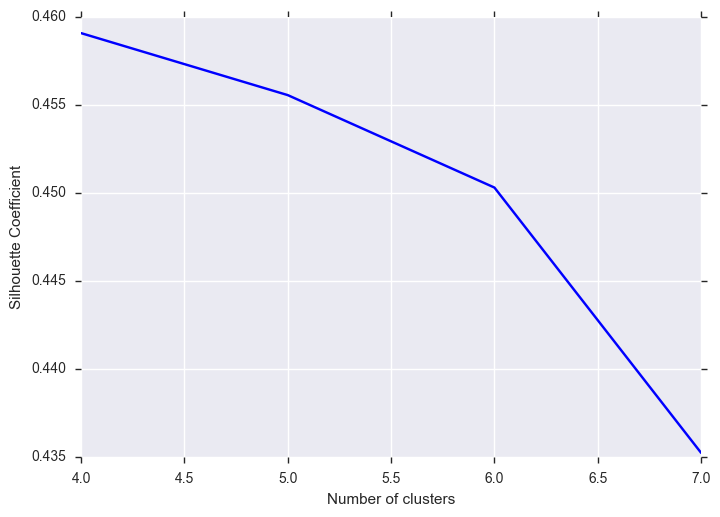

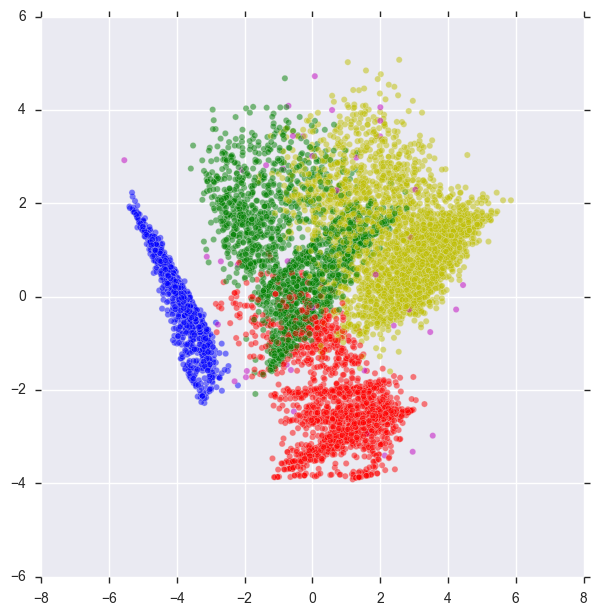

In [184]:
plt.show()

## Since DBSCAN doesn't give clear distinction we will use KMEANS as our clustering algorithm with 4 clusters

In [185]:
CC_mach.dtypes

BALANCE_FREQUENCY                   float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                    float64
PURCHASES_TRX                       float64
MONTHLY_AVERAGE_PURCHASE            float64
MONTHLY_CASH_ADVANCE_AMOUNT         float64
LIMIT_USAGE                         float64
PAYMENTS_MINIMUMPAYMENTS_RATIO      float64
Both                                  uint8
Installment_Purchases                 uint8
None                                  uint8
One_Of                                uint8
dtype: object

In [186]:
df_pair_plot=pd.DataFrame(Reduced_CC, columns=['PC_' + str(i) for i in range(5)])

In [187]:
df_pair_plot['Cluster']=km_4.labels_

In [188]:
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

C:\Users\Anirudh Mathur\Anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Anirudh Mathur\Anaconda2\lib\site-packages\statsmodels\nonparametric\kdetools.py:32: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


In [189]:
col_kpi=['PURCHASES_TRX','MONTHLY_AVERAGE_PURCHASE','MONTHLY_CASH_ADVANCE_AMOUNT','LIMIT_USAGE','CASH_ADVANCE_TRX','PAYMENTS_MINIMUMPAYMENTS_RATIO','Both','Installment_Purchases','One_Of','None',
         'CREDIT_LIMIT']

In [190]:
Cluster_DF=pd.concat([CC_original[col_kpi],pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

In [191]:
Cluster_DF.dtypes

PURCHASES_TRX                       int64
MONTHLY_AVERAGE_PURCHASE          float64
MONTHLY_CASH_ADVANCE_AMOUNT       float64
LIMIT_USAGE                       float64
CASH_ADVANCE_TRX                    int64
PAYMENTS_MINIMUMPAYMENTS_RATIO    float64
Both                                uint8
Installment_Purchases               uint8
One_Of                              uint8
None                                uint8
CREDIT_LIMIT                      float64
Cluster_4                           int32
dtype: object

In [192]:
Cluster_DF.head()

,PURCHASES_TRX,MONTHLY_AVERAGE_PURCHASE,MONTHLY_CASH_ADVANCE_AMOUNT,LIMIT_USAGE,CASH_ADVANCE_TRX,PAYMENTS_MINIMUMPAYMENTS_RATIO,Both,Installment_Purchases,One_Of,None,CREDIT_LIMIT,Cluster_4
0,2,7.950000,0.000000,0.040901,0,1.446508,0,1,0,0,1000.0,1
1,0,0.000000,536.912124,0.457495,4,3.826241,0,0,0,1,7000.0,2
2,12,64.430833,0.000000,0.332687,0,0.991682,0,0,1,0,7500.0,0
3,1,124.916667,17.149001,0.222223,1,0.000000,0,0,1,0,7500.0,0
4,1,1.333333,0.000000,0.681429,0,2.771075,0,0,1,0,1200.0,0


In [193]:
cluster_4=Cluster_DF.groupby('Cluster_4')\
.apply(lambda x: x[col_kpi].mean()).T
cluster_4

Cluster_4,0,1,2,3
PURCHASES_TRX,7.118997,12.055206,0.047346,33.135292
MONTHLY_AVERAGE_PURCHASE,65.612806,45.316477,0.157521,190.051041
MONTHLY_CASH_ADVANCE_AMOUNT,71.478737,30.230170,169.168711,63.488922
LIMIT_USAGE,0.378727,0.263868,0.576375,0.354616
CASH_ADVANCE_TRX,2.864995,1.016158,6.552846,2.808125
PAYMENTS_MINIMUMPAYMENTS_RATIO,5.561421,13.410316,9.923582,7.264788
Both,0.003735,0.002244,0.002391,1.000000
Installment_Purchases,0.000000,0.997756,0.017695,0.000000
One_Of,0.996265,0.000000,0.003348,0.000000
None,0.000000,0.000000,0.976566,0.000000


In [197]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

Cash_Advance=np.log(cluster_4.loc['MONTHLY_CASH_ADVANCE_AMOUNT',:].values)
Limit_Usage_Score=(cluster_4.loc['LIMIT_USAGE',:].values)
Purchase= np.log(cluster_4.loc['MONTHLY_AVERAGE_PURCHASE',:].values)
Payment_To_Minimum_Payment=cluster_4.loc['PAYMENTS_MINIMUMPAYMENTS_RATIO',:].values
Installment=cluster_4.loc['Installment_Purchases',:].values
One_Off=cluster_4.loc['One_Of',:].values


bar_width=.10
b1=plt.bar(index,Cash_Advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,Limit_Usage_Score,color='m',label='Limit_Usage_Score',width=bar_width)
b3=plt.bar(index+2*bar_width,Purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,Payment_To_Minimum_Payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,Installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,One_Off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()

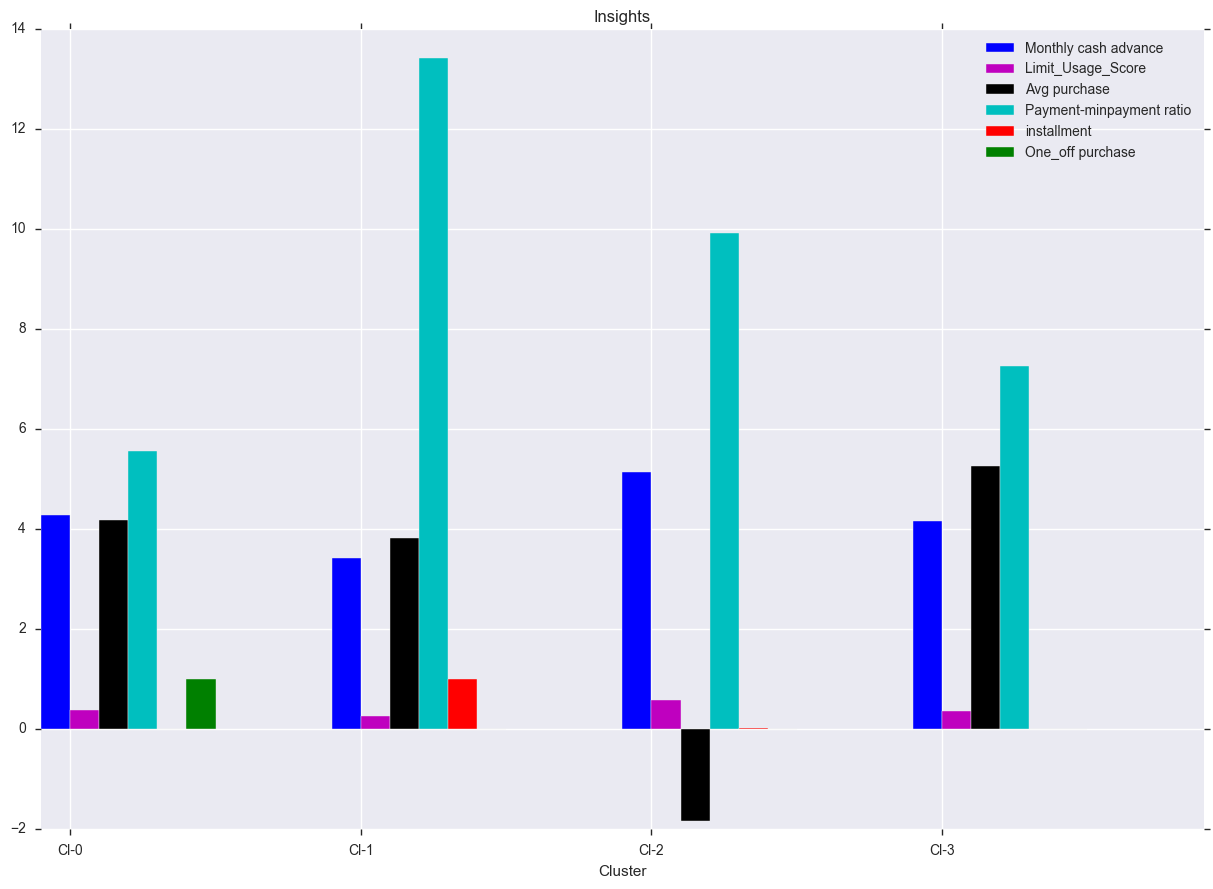

In [198]:
plt.show()

## ---
** Insights**

# Clusters are clearly distinguishing behavior within customers

---

<big>



- Cluster 2 is the group of customers who have highest Monthly_avg purchases and doing both installment as well as one_off   purchases, have comparatively good Limit Usage and should be provided with higher credit limit.
 

 
- cluster 1 is taking maximum advance_cash  and   is paying comparatively less minimum payment and poor Limit Usage & doing no purchase transaction thier credit limit should be stagnant or should be reduced. 



- Cluster 0 customers are doing maximum One_Off transactions  and  least payment ratio.



- Cluster 3 customers have maximum Limit Usage and  are paying dues and are doing maximum installment purchases.


---

